# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [151]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [191]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | My flight on on 12 May 2023...
1,Not Verified | Cairo is a 5 hour flight and B...
2,✅ Trip Verified | After travelling London to ...
3,✅ Trip Verified | My luggage was mis-tagged i...
4,✅ Trip Verified | The airline lost my luggage...


In [5]:
df.shape

(1000, 1)

In [192]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [238]:
data = pd.read_csv('BA_reviews.csv')

In [239]:
data.drop(columns='Unnamed: 0',inplace=True)

#cleaning_reviews

In [240]:
data

,reviews
0,✅ Trip Verified | My flight on on 12 May 2023...
1,Not Verified | Cairo is a 5 hour flight and B...
2,✅ Trip Verified | After travelling London to ...
3,✅ Trip Verified | My luggage was mis-tagged i...
4,✅ Trip Verified | The airline lost my luggage...
...,...
995,✅ Trip Verified | London to Athens. Since I st...
996,✅ Trip Verified | London Heathrow to Singapor...
997,✅ Trip Verified | Philadelphia to London. Nic...
998,✅ Trip Verified | London to Las Vegas I exper...


In [241]:
data['reviews'] = data['reviews'].str.replace('✅','')

In [242]:
data['reviews'] = data['reviews'].str.replace('Trip Verified','')

In [243]:
data['reviews'] = data['reviews'].str.replace('Not Verified ','')

In [244]:
data['reviews'] = data['reviews'].str.replace('|','')

C:\Users\ashut\AppData\Local\Temp\ipykernel_3796\3304441520.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['reviews'] = data['reviews'].str.replace('|','')


In [245]:
data['reviews'] = data['reviews'].str.replace(',','')

In [246]:
#This code will replace all words having <3 characters by a blank.
data['reviews'] = data['reviews'].str.replace(r'\b(\w{1,3})\b','')

C:\Users\ashut\AppData\Local\Temp\ipykernel_3796\1373813347.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['reviews'] = data['reviews'].str.replace(r'\b(\w{1,3})\b','')


In [247]:
data

,reviews
0,flight 2023 delayed hour minutes ...
1,Cairo hour flight considers short ha...
2,After travelling London Madrid with Briti...
3,luggage -tagged Dallas Cairo Londo...
4,airline lost luggage absolutely awful ...
...,...
995,London Athens. Since started using 2011...
996,London Heathrow Singapore. great experi...
997,Philadelphia London. Nice plane nice seat...
998,London Vegas experienced ancient enter...


In [248]:
import string
def punctuation_remover(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation,'')
    return text

In [249]:
data['reviews'] = data['reviews'].apply(punctuation_remover)

In [250]:
frequent_words = pd.Series(' '.join(data['reviews']).lower().split()).value_counts()[:40]

In [251]:
frequent_words

flight      1829
with        1375
that        1144
they        1084
were        1007
this         906
have         843
service      709
from         697
london       604
very         604
seat         519
time         479
food         470
there        466
crew         464
good         422
seats        408
class        405
which        404
staff        392
british      392
cabin        391
when         389
their        384
airways      384
would        375
business     370
after        363
check        346
only         335
heathrow     315
’            312
been         303
hours        302
them         293
back         276
just         270
economy      267
could        265
dtype: int64

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt

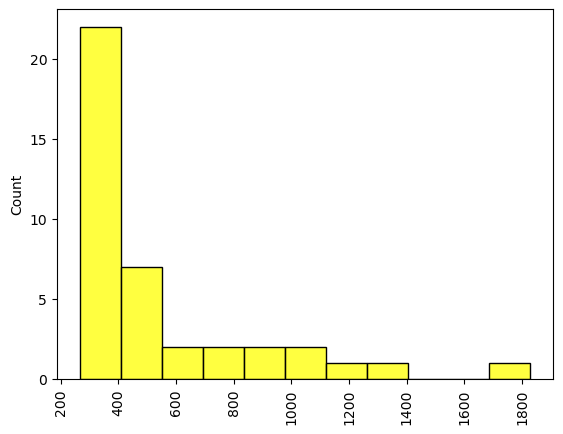

In [253]:
sns.histplot(frequent_words,color='yellow')
plt.xticks(rotation='vertical')
plt.show()

In [254]:
words = pd.DataFrame(frequent_words)

In [255]:
words['index']=words.index

<AxesSubplot:xlabel='0', ylabel='index'>

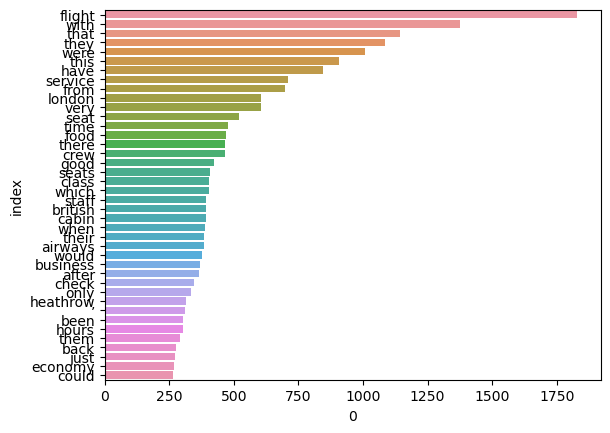

In [256]:
sns.barplot(x=words[0],y=words['index'])

#Making wordcloud for most frequent words

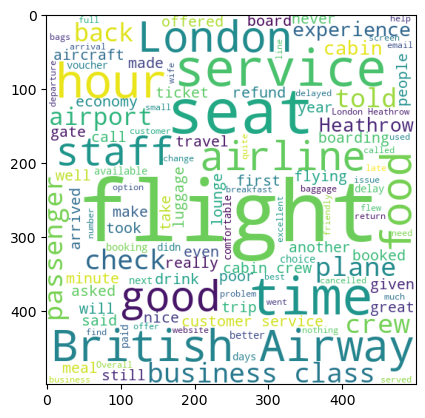

In [257]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(width = 500,height =500,min_font_size=10,background_color='white')
neutral_wc=wc.generate(data['reviews'].str.cat(sep=" "))
plt.imshow(neutral_wc)

#Applying Tfidf_vectorizer

In [258]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

In [259]:
token = RegexpTokenizer(r'\w+')

In [260]:
tf_idf_vec = TfidfVectorizer(lowercase=True,tokenizer=token.tokenize,ngram_range=(1, 1),stop_words='english',)

In [261]:
total_vectors = tf_idf_vec.fit_transform(df['reviews'])

In [262]:
total_vectors.shape

(1000, 7363)

#creating cluster using k_mean clustering

In [263]:
from sklearn.cluster import KMeans

In [264]:
kmean_cluster = KMeans(n_clusters=2)

In [265]:
kmean_cluster = kmean_cluster.fit(total_vectors)

In [266]:
labels = kmean_cluster.labels_

In [267]:
len(labels)

1000

In [268]:
distances_from_cluster = kmean_cluster.cluster_centers_

In [276]:
distances_from_cluster

array([[0.00025665, 0.00289056, 0.00117976, ..., 0.00136429, 0.00016371,
        0.00016371],
       [0.00057947, 0.00058833, 0.00070415, ..., 0.0013608 , 0.        ,
        0.        ]])

In [270]:
positive=[]
negative=[]
for i in labels:
    if i == 0:
        negative.append(i)
    else:
        positive.append(i)
        

In [271]:
len(positive)

600

In [272]:
len(negative)

400

In [273]:
reviews=data['reviews']

In [274]:
new_df = pd.DataFrame({'reviews':reviews,'sentiment':labels})

In [275]:
new_df

,reviews,sentiment
0,flight 2023 delayed hour minutes ...,0
1,Cairo hour flight considers short ha...,1
2,After travelling London Madrid with Briti...,0
3,luggage tagged Dallas Cairo London...,0
4,airline lost luggage absolutely awful ...,0
...,...,...
995,London Athens Since started using 2011 ...,1
996,London Heathrow Singapore great experie...,1
997,Philadelphia London Nice plane nice seats...,1
998,London Vegas experienced ancient enter...,0


#word_cloud for positive review(sentiment)

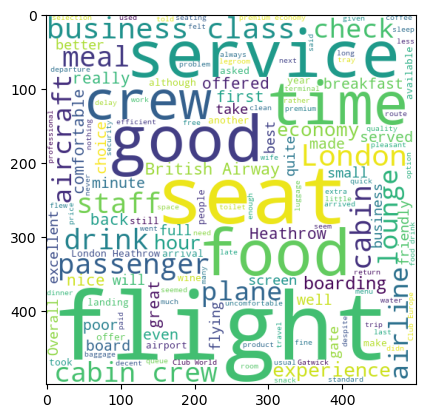

In [282]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(width = 500,height =500,min_font_size=10,background_color='white')
neutral_wc=wc.generate(new_df[new_df['sentiment']==1]['reviews'].str.cat(sep=" "))
plt.imshow(neutral_wc)

word_cloud for negative reviews

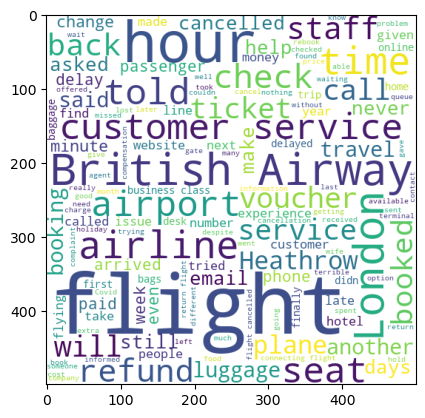

In [283]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(width = 500,height =500,min_font_size=10,background_color='white')
neutral_wc=wc.generate(new_df[new_df['sentiment']==0]['reviews'].str.cat(sep=" "))
plt.imshow(neutral_wc)